Predicting Home Price based on the size of the house using Ridge Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv('homeprices.csv')

In [4]:
df.shape

(5, 2)

In [5]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


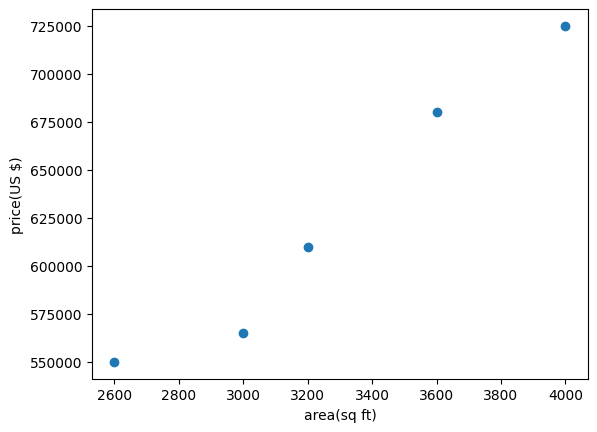

In [29]:
plt.xlabel('area(sq ft)')
plt.ylabel('price(US $)')
plt.scatter(df.area,df.price)

In [6]:
ridge=Ridge()

In [32]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-1,1,5,10,20,30,40,50,60,80,100]}

In [33]:
reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [34]:
reg.fit(df[['area']],df.price)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 20, 30, 40, 50, 60, 80, 100]},
             scoring='neg_mean_squared_error')

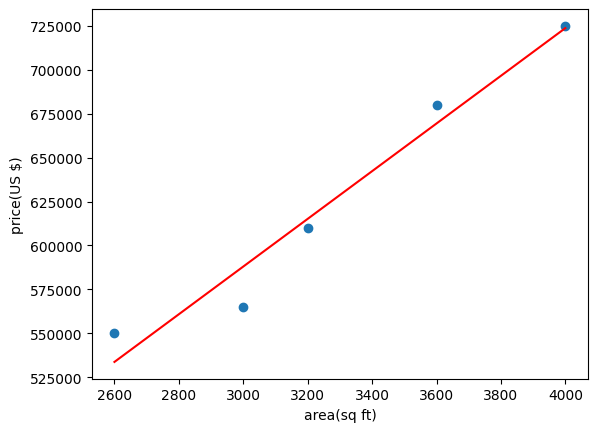

In [35]:
plt.xlabel('area(sq ft)')
plt.ylabel('price(US $)')
plt.scatter(df.area,df.price)
plt.plot(df.area,reg.predict(df[['area']]),color='red')

In [36]:
print(reg.best_params_)

{'alpha': 100}


In [37]:
print(reg.best_score_)

-577801925.2271221


In [38]:
print(reg.predict([[3300]]))

[628715.52093143]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [40]:
d=pd.read_csv("areas.csv")
p=reg.predict(d)
d['prices']=p
d.to_csv('predictions.csv',index=False)